In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
dataframe = pd.read_csv("Transformed Data Set - Sheet1.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [73]:
dataframe.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [74]:
dataframe.Gender.unique()

array(['F', 'M'], dtype=object)

Text(1, 33, '33')

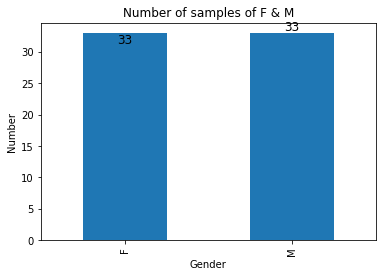

In [75]:
BarNum = dataframe.Gender.value_counts()
BarNum.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('Number of samples of F & M')
plt.text(0, BarNum[0], BarNum[0], fontsize=12, horizontalalignment='center', verticalalignment='top')
plt.text(1, BarNum[1], BarNum[1], fontsize=12, horizontalalignment='center', verticalalignment='bottom')

## Good

In [76]:
dataframe.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


Let's first rename the column names and remove bla

In [77]:
dataframe.rename(columns={'Favorite Color' :'FavoriteColor', 'Favorite Music Genre':'FavoriteMusicGenre', 
                          'Favorite Beverage':'FavoriteBeverage', 'Favorite Soft Drink':'FavoriteSoftDrink'}, inplace=True)

In [78]:
dataframe.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


As we see that all the columns are of type object, so we will have to bring them all in type numeric. We will use Label Encoding Technique.

In [79]:
'''
#Method 1 when we have all the columns as type object
from sklearn.preprocessing import LabelEncoder
dataframe.apply(LabelEncoder().fit_transform)
'''

'\n#Method 1 when we have all the columns as type object\nfrom sklearn.preprocessing import LabelEncoder\ndataframe.apply(LabelEncoder().fit_transform)\n'

Method 2 - when we have mixed type columns. Then fetch the list of column names of type object type programmatically  and then Label Encode them

In [80]:

#Fetch features of type Object
objFeatures = dataframe.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    dataframe[feat] = le.fit_transform(dataframe[feat].astype(str))
    
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FavoriteColor       66 non-null     int32
 1   FavoriteMusicGenre  66 non-null     int32
 2   FavoriteBeverage    66 non-null     int32
 3   FavoriteSoftDrink   66 non-null     int32
 4   Gender              66 non-null     int32
dtypes: int32(5)
memory usage: 1.4 KB


In [81]:
objFeatures

Index(['FavoriteColor', 'FavoriteMusicGenre', 'FavoriteBeverage',
       'FavoriteSoftDrink', 'Gender'],
      dtype='object')

In [82]:
le

LabelEncoder()

In [83]:
dataframe[feat]

0     0
1     0
2     0
3     0
4     0
     ..
61    1
62    1
63    1
64    1
65    1
Name: Gender, Length: 66, dtype: int32

D:\AnacondaJupyterNotebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FavoriteColor', ylabel='count'>

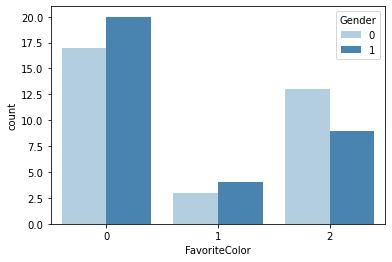

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('FavoriteColor', hue='Gender', data=dataframe, palette='Blues')

D:\AnacondaJupyterNotebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FavoriteMusicGenre', ylabel='count'>

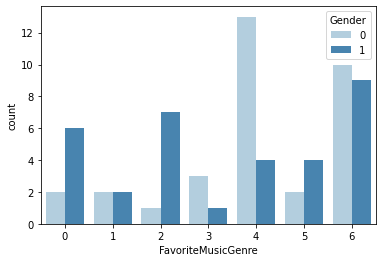

In [106]:
sns.countplot('FavoriteMusicGenre', hue='Gender', data=dataframe, palette='Blues')

D:\AnacondaJupyterNotebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FavoriteBeverage', ylabel='count'>

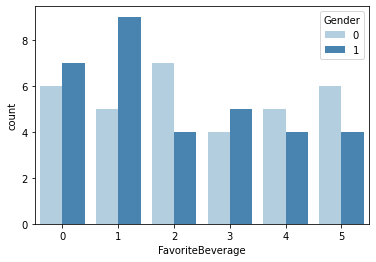

In [107]:
sns.countplot('FavoriteBeverage', hue='Gender', data=dataframe, palette='Blues')

D:\AnacondaJupyterNotebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FavoriteSoftDrink', ylabel='count'>

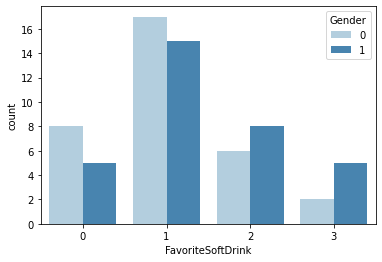

In [108]:
sns.countplot('FavoriteSoftDrink', hue='Gender', data=dataframe, palette='Blues')

In [85]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FavoriteColor       66 non-null     int32
 1   FavoriteMusicGenre  66 non-null     int32
 2   FavoriteBeverage    66 non-null     int32
 3   FavoriteSoftDrink   66 non-null     int32
 4   Gender              66 non-null     int32
dtypes: int32(5)
memory usage: 1.4 KB


In [86]:
dataframe.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [87]:
X = dataframe.drop(['Gender'], axis = 1)
y = dataframe.Gender

In [88]:
X.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink
0,0,6,3,0
1,1,2,3,1
2,2,6,5,1
3,2,1,4,2
4,0,6,3,1


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [91]:
X_train.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink
6,0,4,0,1
28,0,4,1,1
4,0,6,3,1
48,0,6,1,3
36,1,6,1,1


In [92]:
X_test.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink
54,0,0,1,2
62,0,2,0,1
0,0,6,3,0
45,0,2,0,1
5,2,3,1,2


In [93]:
y_train.head()

6     0
28    0
4     0
48    1
36    1
Name: Gender, dtype: int32

In [94]:
y_test.head()

54    1
62    1
0     0
45    1
5     0
Name: Gender, dtype: int32

In [95]:
print('Number of train sample: %d' % len(X_train))
print('Number of test sample: %d' % len(X_test))
print('Total sample: %d' % (len(X_train)+len(X_test)))

Number of train sample: 46
Number of test sample: 20
Total sample: 66


In [96]:
X

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink
0,0,6,3,0
1,1,2,3,1
2,2,6,5,1
3,2,1,4,2
4,0,6,3,1
...,...,...,...,...
61,0,6,3,1
62,0,2,0,1
63,1,2,1,2
64,0,6,5,1


In [97]:
y

0     0
1     0
2     0
3     0
4     0
     ..
61    1
62    1
63    1
64    1
65    1
Name: Gender, Length: 66, dtype: int32

In [102]:
data=pd.merge(X,y,left_index=True,right_index=True)
data.head()

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    
    return acc_train, acc_test, roc, correct, incorrect, cm


In [14]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

(58.69565217391305, 35.0, 34.84848484848485, 7, 13, array([[4, 7],
       [6, 3]], dtype=int64))


In [15]:
#2. KNN

from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

Y_pred_knn = clf_knn.predict(X_test)
print(clf_scores(clf_knn, Y_pred_knn))

(78.26086956521739, 40.0, 39.39393939393939, 8, 12, array([[5, 6],
       [6, 3]], dtype=int64))


In [16]:
#3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

Y_pred_gnb = clf_gnb.predict(X_test)
print(clf_scores(clf_gnb, Y_pred_gnb))

(54.347826086956516, 60.0, 58.58585858585859, 12, 8, array([[8, 3],
       [5, 4]], dtype=int64))


In [17]:
#4. SVM 
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)

Y_pred_svm = clf_svm.predict(X_test)
print(clf_scores(clf_svm, Y_pred_svm))

(71.73913043478261, 35.0, 36.868686868686865, 7, 13, array([[2, 9],
       [4, 5]], dtype=int64))


In [18]:
#5. Decision tree
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

Y_pred_dt = clf_dt.predict(X_test)
print(clf_scores(clf_dt, Y_pred_dt))

(97.82608695652173, 45.0, 42.92929292929293, 9, 11, array([[7, 4],
       [7, 2]], dtype=int64))


In [19]:
#6. Radom forest classifier

from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(max_depth=10, random_state=42)
clf_rfc.fit(X_train, y_train)

Y_pred_rfc = clf_rfc.predict(X_test)
print(clf_scores(clf_rfc, Y_pred_rfc))

(97.82608695652173, 20.0, 18.181818181818183, 4, 16, array([[4, 7],
       [9, 0]], dtype=int64))


In [20]:
#7. Gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(random_state=42)
clf_gbc.fit(X_train, y_train)

Y_pred_gbc = clf_gbc.predict(X_test)
print(clf_scores(clf_gbc, Y_pred_gbc))

(97.82608695652173, 35.0, 31.818181818181817, 7, 13, array([[7, 4],
       [9, 0]], dtype=int64))
